<div>
<img src="logo.jpg" width="1000"/>
</div>

### Contenido:

- 1) Introducción a FinScore
- 2) Dataset y Analisis de Variables
- 3) Desarrollo del Modelo
- 4) Conlusiones
- 5) Aplicacion del Modelo Predictivo !

## 1. Introducción a FinScore

***Introduccion a FinScore*** : FinScore es un algoritmo escrito en Python que busca realizar simples predicciones en la variacion de el precio de las acciones en el mercado financiero. Con el uso de regresiones lineales y regresiones no lineales, se implementa un algoritmo de machine learning que busca tratar de predecir valores futuros a base de datos financieros previos de varias empresas (en este caso presentes en el indice NASDAQ).


***Modelo Teórico*** : Las variables microeconomicas de las empresas que se tuvieron en cuenta son el precio de la accion y el patrimonio o *equity*, el cual contiene informacion sobre los resultados entre los activos (inventario,inmuebles,maquinaria,efectivo,etc) y pasivos(deudas, etc) de la empresa, indicando el estado financiero global.

Otras variables fueron tenidas en cuenta. Variables macroeconomicas como la inflacion, tasa de interes y crecimiento del PBI fueron tenidas en cuenta ya que juegan un papel importante el desempeño de la economia, como asi en el caso de cada empresa en particular.

**x: x1,x2,x3,...,xn** / conjunto de variables micro y macroeconomicas

El algoritmo analiza todas estas variables por empresa y por año, para obtener su relacion con el crecimiento de la empresa en relacion al valor de sus acciones, en particular con la variacion interanual del precio de las acciones. 

**y= w1.f1(x1) + w2.f2(x2) + w3.f3(x3) + ... + wn.fn(xn)** / **y**: variables output como funcion de un modelo de regresion lineal o no-lineal donde **f** indica la dependencia funcional de cada variable con y

Por ultimo se puede realizar predicciones financieras del precio de la accion a 1 año de plazo desde la fecha presente ingresando las variables requeridas por el algoritmo. El algoritmo logra obtener un SCORE o R2, asi como el indicador Q de margen de error que indican la confianza con la prediccion.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.optimize import curve_fit
from matplotlib import pyplot
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

## 2. Dataset y Analisis de Variables
### 2.1 Dataset

Para el presente trabajo se recopilo un conjunto de datos financieros de cada empresa que se analizo a partir de las siguientes paginas web:

- https://finance.yahoo.com/ / para obtener el valor intranual e interanual de precio de las acciones

- https://www.macrotrends.net/ / para obtener datos financieros interanuales de las empresas

A partir de dichos datos se creo el siguiente dataset que contiene las siguientes variables:

<table >
<thead>
  <tr>
    <th>#</th>
    <th>Variable</th>
    <th>Concepto</th>
  </tr>
</thead>
<tbody>
    <tr>
        <th>1</th>
        <td>company</td>
        <td>empresa</td>
    </tr>
    <tr>
        <th>2</th>
        <td>year</td>
        <td>año</td>    
    </tr>
    <tr>
        <th>3</th>
        <td>e</td>
        <td>'"equity" o patrimonio</td>    
    </tr>
    <tr>
        <th>4</th>
        <td>v</td>
        <td>volatilidad intranual del precio de la accion - año previo</tr>
    <tr>
        <th>5</th>
        <td>e.</td>
        <td>variacion interanual del equity (derivada primera) - año previo</td>   
    </tr>
    <tr>
        <th>6</th>
      <td>e..</td>
      <td>tasa de cambio de la variacion interanuial del equity(derivada segunda) - año previo</td>  
    </tr>
    <tr>
        <th>7</th>
      <td>s.</td>
      <td>variacion interanual del precio de la accion (derivada primera) - año previo</td> 
    </tr>
    <tr>
        <th>8</th>
      <td>s..</td>
      <td>tasa de cambio de la variacion interanuial del precio de la accion(derivada segunda) - año previo</td>   
    </tr>
    <tr>
        <th>9</th>
      <td>i</td>
      <td>inflacion - año previo</td>   
    </tr>
    <tr>
        <th>10</th>
      <td>r</td>
      <td>tasa de interes - año previo</td>   
    </tr>
    <tr>
        <th>11</th>
      <td>p.</td>
      <td>variacion interanual del pbi - año previo</td> 
    </tr>
    <tr>
        <th>12</th>
      <td>s</td>
      <td>precio de la accion - año previo</td>    
    </tr>
    <tr>
        <th>13</th>
      <td>y</td>
      <td> Variable Output: variacion interanual del precio de la accion </td>
   
</tbody>
</table>

In [ ]:
# Las variables v,e.,e..,s.,s..,i,r,p,y se expresan en valores relativo
df=pd.read_csv('nasdaqfinancial.csv')
df=df.dropna()
df.head(5)

,company,year,e,v,e.,e..,s.,s..,i,r,p.,s,y
0,aapl,2022,63090,0.103239,-0.034420,-0.876153,0.471376,7.000000,0.0704,0.0008,0.056711,155.0,0.100986
1,aapl,2021,65339,0.230112,-0.277926,0.787561,0.830245,-0.579473,0.0136,0.0036,-0.034046,141.0,0.471376
2,aapl,2020,90488,0.158486,-0.155478,-0.225228,0.106197,-0.435051,0.0229,0.0216,0.022889,96.0,0.830245
3,aapl,2019,107147,0.108332,-0.200676,-5.000000,0.252532,-4.000000,0.0191,0.0179,0.029189,52.0,0.106197
4,aapl,2018,134047,0.091213,0.045209,-0.393309,0.447000,-1.000000,0.0211,0.0100,0.022557,47.0,0.252532


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 260
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   company  185 non-null    object 
 1   year     185 non-null    int64  
 2   e        185 non-null    int64  
 3   v        185 non-null    float64
 4   e.       185 non-null    float64
 5   e..      185 non-null    float64
 6   s.       185 non-null    float64
 7   s..      185 non-null    float64
 8   i        185 non-null    float64
 9   r        185 non-null    float64
 10  p.       185 non-null    float64
 11  s        185 non-null    float64
 12  y        185 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 20.2+ KB


Text(0.5, 1.0, 'Share Price Year/Change Evolution ')

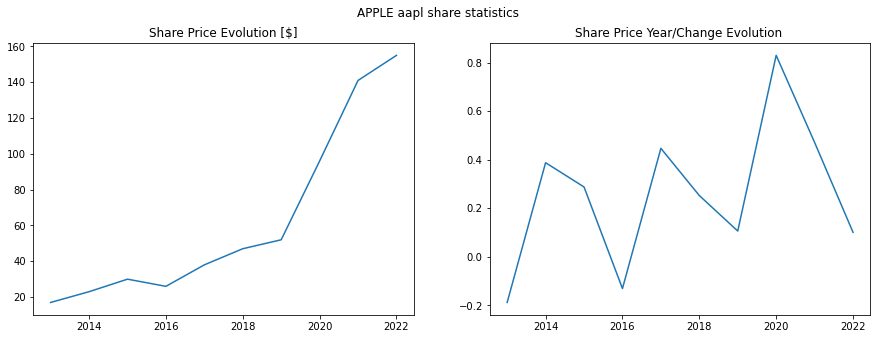

In [ ]:
# Visualizacion del desempeño de una empresa en particular
d = df.loc[df["company"] == "aapl"]
x=d['year']
y1=d['s']
y2=d['y']

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(15)
fig.suptitle('APPLE aapl share statistics')
ax1.plot(x, y1)
ax1.set_title("Share Price Evolution [$]")
ax2.plot(x, y2)
ax2.set_title("Share Price Year/Change Evolution ")

### 2.2 Analisis de variables 

A continuacion se procedio a analizar la relacion entre las variables input y la variable output por separado. Tambien se obtuvo la relacion funcional mas optima que ajustaba a dicha relacion.

Func constants: [ 0.34065343 -5.28141762]
R2-score: -108.18
mean_absolute_error: 0.24


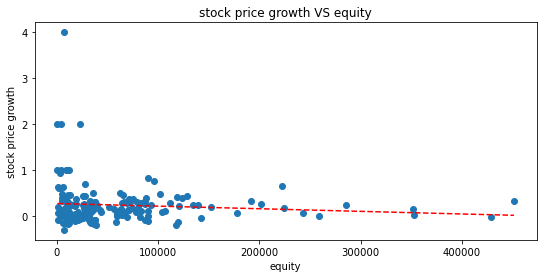

In [ ]:
# Stock price growth VS equity

def func2(x,a,b):
 return  b*x+a

data = df.values
x, y = data[:, 2],data[:, -1]

popt2, _ = curve_fit(func2, x, y)
y2 = func2(x, *popt2)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y2,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y2,y))

x_line = np.arange(min(x), max(x), 1)
y_line = func2(x_line, *popt2)

plt.figure(figsize=(9,4))
plt.xlabel('equity')
plt.ylabel('stock price growth')
plt.title('stock price growth VS equity')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -1.34
mean_absolute_error: 0.20


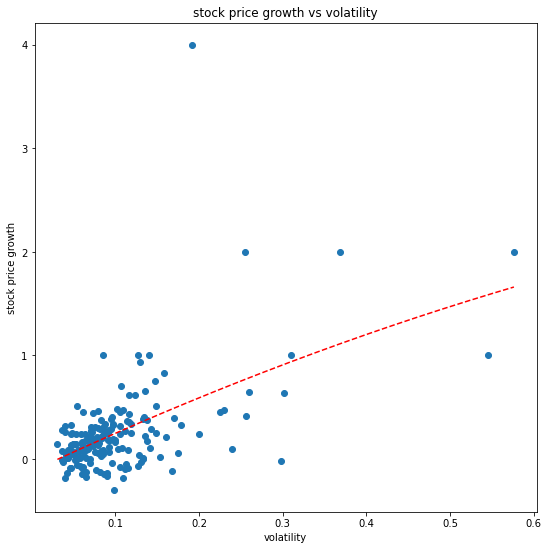

In [ ]:
# stock price growth VS volatility

def func3(x,a,b,c):
 return  c*x**2+b*x+a

data = df.values
x, y = data[:, 3],data[:, -1]

popt3, _ = curve_fit(func3, x, y)
y3 = func3(x, *popt3)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y3,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y3,y))

x_line = np.arange(min(x), max(x), 0.0001)
y_line = func3(x_line, *popt3)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs volatility")
plt.xlabel('volatility')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -10.77
mean_absolute_error: 0.23


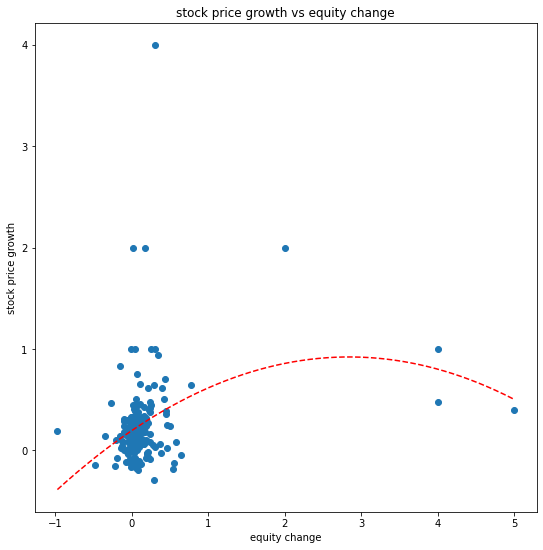

In [ ]:
# stock price growth VS equity change

def func4(x,a,b,c):
 return  c*x**2+b*x+a

data = df.values
x, y = data[:, 4],data[:, -1]

popt4, _ = curve_fit(func4, x, y)
y4 = func4(x, *popt4)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y4,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y4,y))

x_line = np.arange(min(x), max(x), 0.01)
y_line = func4(x_line, *popt4)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs equity change")
plt.xlabel('equity change')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -100.94
mean_absolute_error: 0.24


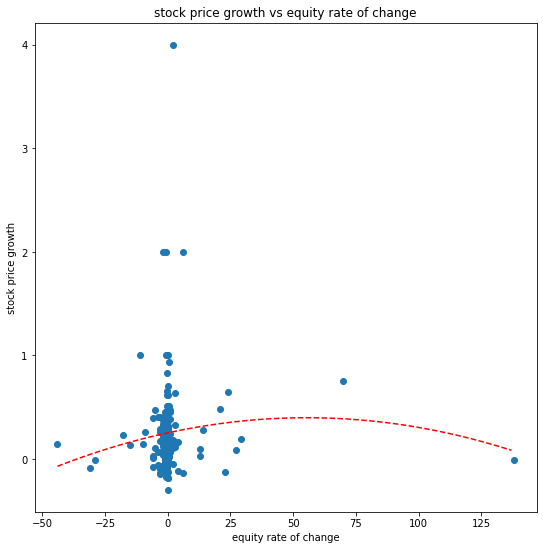

In [ ]:
# stock price growth VS equity rate of change

def func5(x,a,b,c):
 return  c*x**2+b*x+a

data = df.values
x, y = data[:, 5],data[:, -1]

popt5, _ = curve_fit(func5, x, y)
y5 = func5(x, *popt5)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y5,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y5,y))

x_line = np.arange(min(x), max(x), 1)
y_line = func5(x_line, *popt5)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs equity rate of change")
plt.xlabel('equity rate of change')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -5.58
mean_absolute_error: 0.22


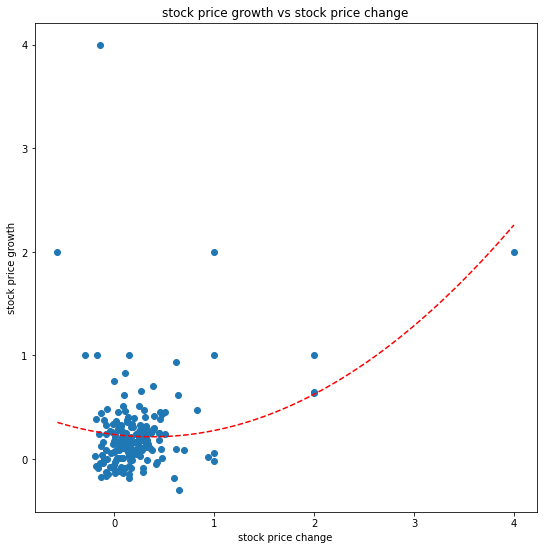

In [ ]:
# stock price growth VS stock price change

def func6(x,a,b,c):
 return  c*x**2+b*x+a

data = df.values
x, y = data[:, 6],data[:, -1]

popt6, _ = curve_fit(func6, x, y)
y6 = func6(x, *popt6)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y6,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y6,y))

x_line = np.arange(min(x), max(x), 0.01)
y_line = func6(x_line, *popt6)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs stock price change")
plt.xlabel('stock price change')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -5298.30
mean_absolute_error: 0.24


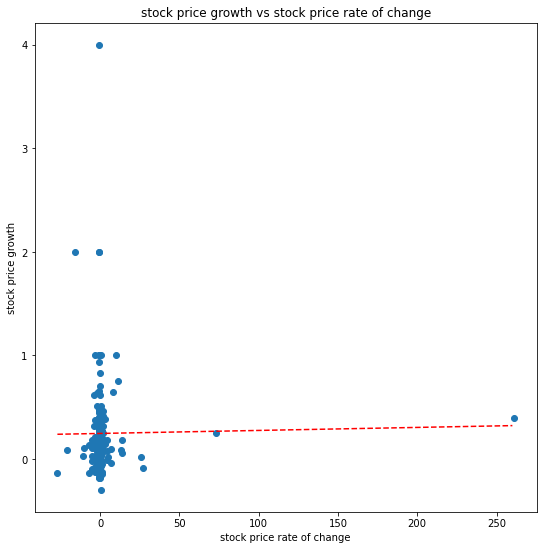

In [ ]:
# stock price growth VS stock price rate of change

def func7(x,a,b):
 return  b*x+a

data = df.values
x, y = data[:, 7],data[:, -1]

popt7, _ = curve_fit(func7, x, y)
y7 = func7(x, *popt7)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y7,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y7,y))

x_line = np.arange(min(x), max(x), 1)
y_line = func7(x_line, *popt7)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs stock price rate of change")
plt.xlabel('stock price rate of change')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -42.23
mean_absolute_error: 0.23


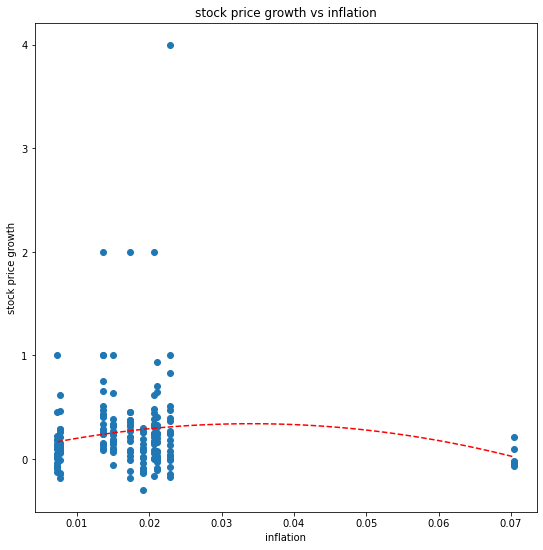

In [ ]:
# stock price growth VS inflation

def func8(x,a,b,c):
 return  c*x**2+b*x+a

data = df.values
x, y = data[:, 8],data[:, -1]

popt8, _ = curve_fit(func8, x, y)
y8 = func8(x, *popt8)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y8,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y8,y))

x_line = np.arange(min(x), max(x), 0.001)
y_line = func8(x_line, *popt8)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs inflation")
plt.xlabel('inflation')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -10.52
mean_absolute_error: 0.23


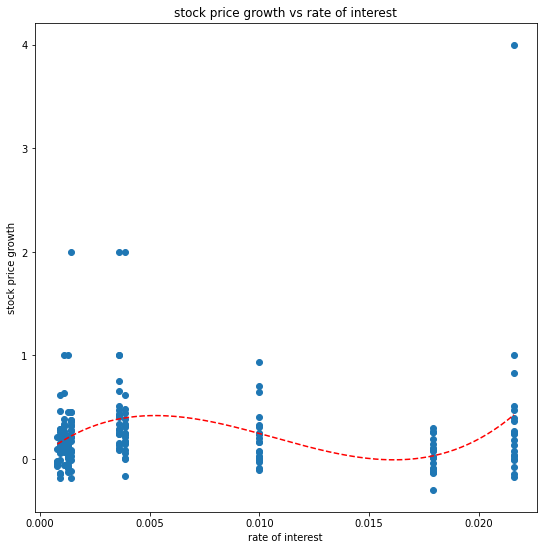

In [ ]:
# stock price growth VS rate of interest

def func9(x,a,b,c,d):
 return  d*x**3+c*x**2+b*x+a

data = df.values
x, y = data[:, 9],data[:, -1]

popt9, _ = curve_fit(func9, x, y)
y9 = func9(x, *popt9)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y9,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y9,y))

x_line = np.arange(min(x), max(x), 0.0001)
y_line = func9(x_line, *popt9)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs rate of interest")
plt.xlabel('rate of interest')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Func constants: [ 0.34065343 -5.28141762]
R2-score: -16.06
mean_absolute_error: 0.23


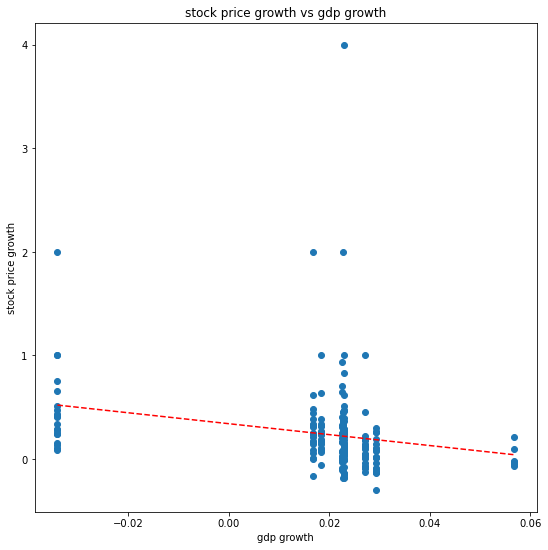

In [ ]:
# stock price growth VS gdp growth

def func10(x,a,b):
 return  b*x+a

data = df.values
x, y = data[:, 10],data[:, -1]

popt10, _ = curve_fit(func10, x, y)
y10 = func10(x, *popt10)

print('Func constants:', popt)
print("R2-score: %.2f" % r2_score(y10,y))
print("mean_absolute_error: %.2f" % mean_absolute_error(y10,y))

x_line = np.arange(min(x), max(x), 0.0001)
y_line = func10(x_line, *popt10)

plt.figure(figsize=(9,9))
plt.title("stock price growth vs gdp growth")
plt.xlabel('gdp growth')
plt.ylabel('stock price growth')
pyplot.scatter(x, y)
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

## 3.  Desarrollo del Modelo
### 3.1 Regresion Lineal

In [ ]:
x=df[['e','v','e.','e..','s.','s..','i','r','p.']]
y=df[['y']]

linear1=LinearRegression()
model1=linear1.fit(x,y)


r_sq1 = model1.score(x, y)
print(f"accuracy: {r_sq1}")

accuracy: 0.3509993603688154


### 3.2. Regresion No-Lineal

In [ ]:
df2 = pd.DataFrame(list(zip(y2,y3,y4,y5,y6,y7,y8,y9,y10)),columns=['y2','y3','y4','y5','y6','y7','y8','y9','y10'])

from sklearn import metrics
x=df2[['y2','y3','y4','y5','y6','y7','y8','y9','y10']]
y=df[['y']]

linear2=LinearRegression()
model2=linear2.fit(x,y)

r_sq2 = model2.score(x, y)
y_pred=model2.predict(x)

print("Accuracy:",r_sq2)
print("MAE:",metrics.mean_absolute_error(y, y_pred))

q=metrics.mean_absolute_error(y, y_pred)/df['y'].mean()

print("Mean Y Value:",df['y'].mean())
print('Q error:',q)

Accuracy: 0.3601138676045298
MAE: 0.19292044577451953
Mean Y Value: 0.24684120492972964
Q error: 0.7815568953710131


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Precio actual 2022= 155
Precio prediccion 2023= [[155.01830483]] +/- [[15.77520083]]


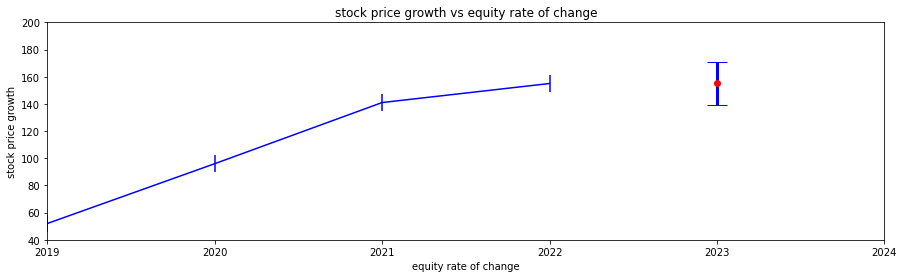

In [ ]:
ticker="aapl"

d = df.loc[df["company"] == "aapl"]
x1=d['year']
y1=d['s']

xi=[63090,0.103239,0.034420,0.876153,0.471376,7.000000,0.0704,0.0008,0.056711]
x=[func2(xi[0],*popt2),func3(xi[1],*popt3),func4(xi[2],*popt4),func5(xi[3],*popt5),func6(xi[4],*popt6),func7(xi[5],*popt7),func8(xi[6],*popt8),func9(xi[7],*popt9),func10(xi[8],*popt10)]

x2=2023
y2=155 + model2.predict([x])

v= df['v'].mean()*d['s'].mean()
verr= df['v'].mean()*y2+model2.predict([x])*q
print("Precio actual 2022 =",155)
print("Precio prediccion 2023=",y2,"+/-",verr)

plt.figure(figsize=(15,4))
plt.title("stock price growth vs equity rate of change")
plt.xlabel('equity rate of change')
plt.ylabel('stock price growth')
plt.xlim(2019,2024)
plt.ylim(40,200)
plt.errorbar(x1, y1, yerr=v,color = 'blue',ecolor = 'blue')
plt.errorbar(x2, y2, yerr=verr,fmt='o',color = 'red',ecolor = 'blue',elinewidth = 3,capsize=10)
plt.show()

## 4. Conclusion

- El algoritmo logra realizar una prediccion a 1 año destacando el margen de error
- El score del modelo sobre la **variaciones del precio de las acciones es del 36%**
- Puede mejorarse el modelo aumentando la cantidad de datos, agregando variables aun no consideradas y mejorando aun mas el modelo matematico aplicado sobre cada variable.
